In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shreshthanagpal","key":"3d5cd826fa55d0d22b828b14e66fbc5a"}'}

{}

In [5]:
import os
import zipfile

os.makedirs("/root/.kaggle", exist_ok=True)
os.rename("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)

In [8]:
!pip install -q kaggle
!kaggle competitions download -c GiveMeSomeCredit

  0% 0.00/5.16M [00:00<?, ?B/s]
100% 5.16M/5.16M [00:00<00:00, 574MB/s]


In [9]:
with zipfile.ZipFile("GiveMeSomeCredit.zip", "r") as zip_ref:
    zip_ref.extractall("credit_data")

In [10]:
import pandas as pd

df = pd.read_csv("credit_data/cs-training.csv")
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [47]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
code interupter

In [14]:
df.to_csv("/content/drive/MyDrive/credit_data.csv", index=False)

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# code interupter

In [50]:
df=pd.read_csv("/content/drive/MyDrive/credit_data.csv")

In [51]:
df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [52]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [174]:
df[df['DebtRatio'] > 5][['DebtRatio', 'MonthlyIncome']].head(10)


,DebtRatio,MonthlyIncome
6,5710.0,5400.0
8,46.0,5400.0
14,477.0,0.0
16,2058.0,5400.0
32,977.0,5400.0
41,75.0,5400.0
44,1687.5,1.0
50,3095.0,0.0
58,2477.0,5400.0
62,1720.0,5400.0


In [175]:
df['MonthlyIncome'].isnull().sum(), (df['MonthlyIncome'] == 0).sum()


(np.int64(0), np.int64(1634))

In [176]:
df = df[df['DebtRatio'] < 10]

In [177]:
df.DebtRatio.min()

0.0

In [178]:
df.DebtRatio.max()

9.906298003

In [179]:
df.isnull().sum()

,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0
NumberOfDependents,0


In [54]:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [55]:
## we can fill the null values that were seen in monthly income and Number of dependents with median vals
df.fillna(df.median(), inplace=True)

In [56]:
df.isnull().sum()

,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0


In [57]:
# we will keep the outliers as they are probable to exist in the real world datasets and thus we have to work around them

In [58]:
#renaming SeriousDlqin2yrs to default  to Create meaningful features

In [181]:
df['Default'] = df['SeriousDlqin2yrs']

In [182]:
df

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Default
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,1
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
149994,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0,0
149995,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,0
149996,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,0
149998,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,0


In [61]:
df.drop('SeriousDlqin2yrs', axis=1, inplace=True)


## EDA

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121006 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  121006 non-null  float64
 1   age                                   121006 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  121006 non-null  int64  
 3   DebtRatio                             121006 non-null  float64
 4   MonthlyIncome                         121006 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       121006 non-null  int64  
 6   NumberOfTimes90DaysLate               121006 non-null  int64  
 7   NumberRealEstateLoansOrLines          121006 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  121006 non-null  int64  
 9   NumberOfDependents                    121006 non-null  float64
 10  Default                               121006 non-null  int64  
dtypes: fl

In [184]:
df.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Default
count,121006.000000,121006.000000,121006.000000,121006.000000,1.210060e+05,121006.000000,121006.000000,121006.000000,121006.000000,121006.000000,121006.000000
mean,0.334875,51.571112,0.453837,0.409511,6.754807e+03,8.639150,0.287953,1.033007,0.263070,0.833339,0.069509
std,0.364252,14.681963,4.431642,0.675228,1.431513e+04,5.207562,4.408339,1.149968,4.395052,1.141123,0.254319
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.032422,41.000000,0.000000,0.135292,3.500000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.173651,51.000000,0.000000,0.289829,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.583400,62.000000,0.000000,0.473755,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,2.000000,105.000000,98.000000,9.906298,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,1.000000


In [185]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RevolvingUtilizationOfUnsecuredLines,121006.0,0.334875,0.364252,0.0,0.032422,0.173651,0.583400,2.000000e+00
age,121006.0,51.571112,14.681963,0.0,41.000000,51.000000,62.000000,1.050000e+02
NumberOfTime30-59DaysPastDueNotWorse,121006.0,0.453837,4.431642,0.0,0.000000,0.000000,0.000000,9.800000e+01
DebtRatio,121006.0,0.409511,0.675228,0.0,0.135292,0.289829,0.473755,9.906298e+00
MonthlyIncome,121006.0,6754.807018,14315.129479,0.0,3500.000000,5400.000000,8200.000000,3.008750e+06
NumberOfOpenCreditLinesAndLoans,121006.0,8.639150,5.207562,0.0,5.000000,8.000000,11.000000,5.800000e+01
NumberOfTimes90DaysLate,121006.0,0.287953,4.408339,0.0,0.000000,0.000000,0.000000,9.800000e+01
NumberRealEstateLoansOrLines,121006.0,1.033007,1.149968,0.0,0.000000,1.000000,2.000000,5.400000e+01
NumberOfTime60-89DaysPastDueNotWorse,121006.0,0.263070,4.395052,0.0,0.000000,0.000000,0.000000,9.800000e+01
NumberOfDependents,121006.0,0.833339,1.141123,0.0,0.000000,0.000000,1.000000,2.000000e+01


<Axes: xlabel='Default', ylabel='count'>

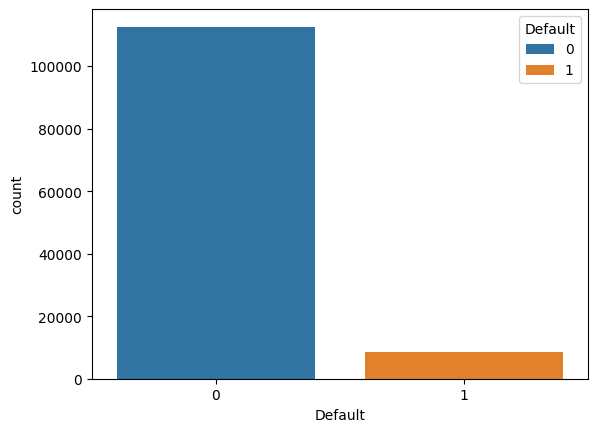

In [186]:
sns.countplot(x='Default', data=df,hue='Default')

In [187]:
# Percentage breakdown
default_rate = df['Default'].value_counts(normalize=True) * 100
print(default_rate)

Default
0    93.049105
1     6.950895
Name: proportion, dtype: float64


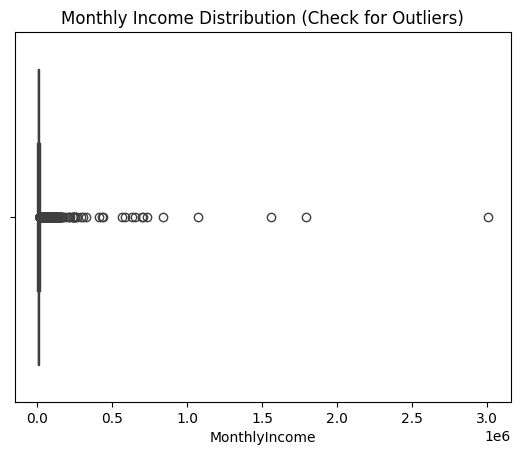

In [188]:
sns.boxplot(x=df['MonthlyIncome'])
plt.title("Monthly Income Distribution (Check for Outliers)")
plt.show()

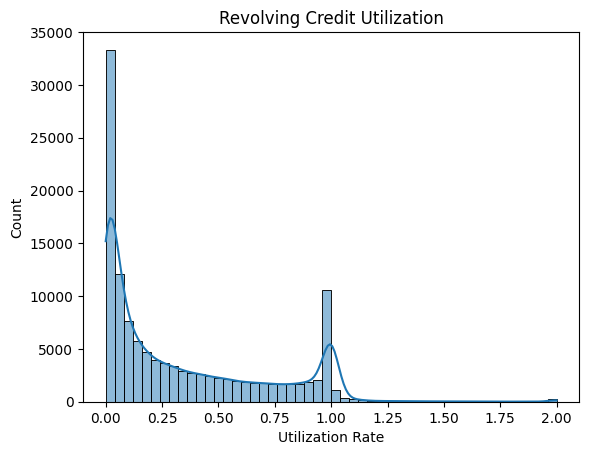

In [189]:
sns.histplot(df['RevolvingUtilizationOfUnsecuredLines'], bins=50, kde=True)
plt.title("Revolving Credit Utilization")
plt.xlabel("Utilization Rate")
plt.show()


### we can clearly see that extreme outliers are significantly skewing the distributions of both

### The histogram reveals:

### A very tall peak near 0: Majority of users are within a normal utilization range (say 0–1).

###A long, thin tail to the right: Values going up to 50,000+, which are clearly erroneous or anomalous.



## WHAT WE CAN DO?
### Clip values at a reasonable max (say 1.5 or 2.0)

### Or filter out these extreme cases entirely



In [190]:
# Clip all values greater than 2.0 (200% utilization)
df['RevolvingUtilizationOfUnsecuredLines'] = df['RevolvingUtilizationOfUnsecuredLines'].clip(upper=2.0)

In [191]:
# Drop rows with unrealistic utilization
df = df[df['RevolvingUtilizationOfUnsecuredLines'] <= 2.0]

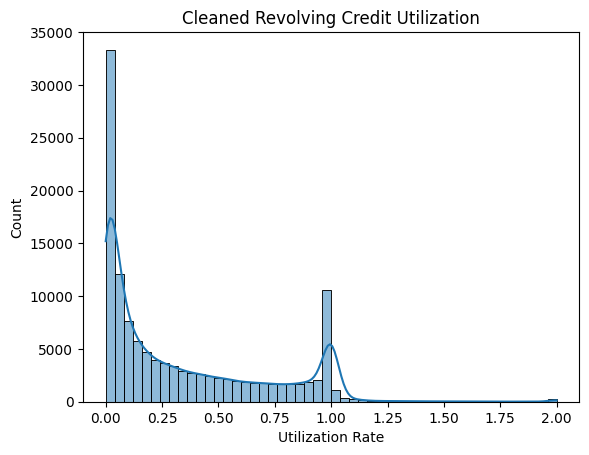

In [192]:
sns.histplot(df['RevolvingUtilizationOfUnsecuredLines'], bins=50, kde=True)
plt.title("Cleaned Revolving Credit Utilization")
plt.xlabel("Utilization Rate")
plt.show()

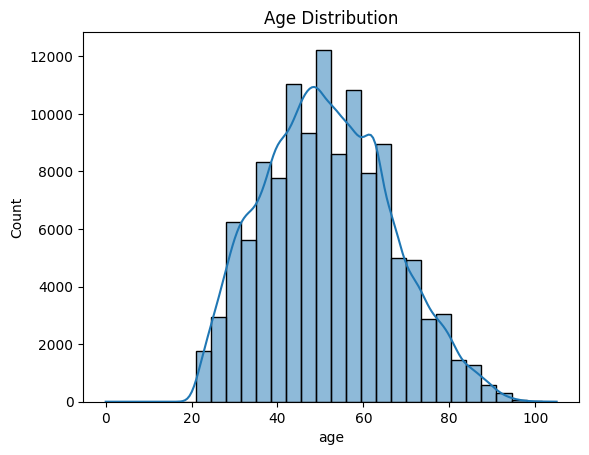

In [193]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

## now we can see a normal utilization limit free of those anomalies that skewed the mean and variance

# Univariate & Bivariate Feature Analysis

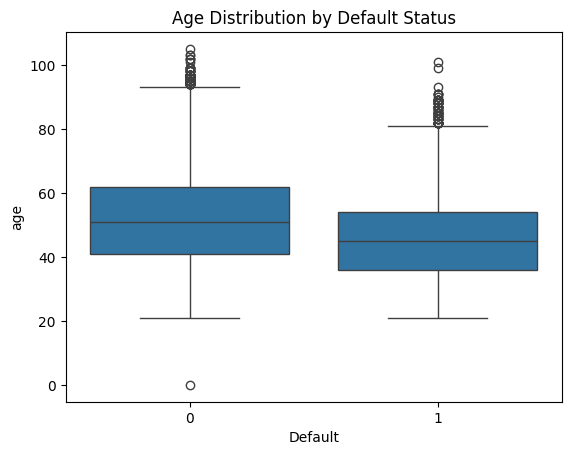

In [194]:
sns.boxplot(x='Default', y='age', data=df)
plt.title("Age Distribution by Default Status")
plt.show()

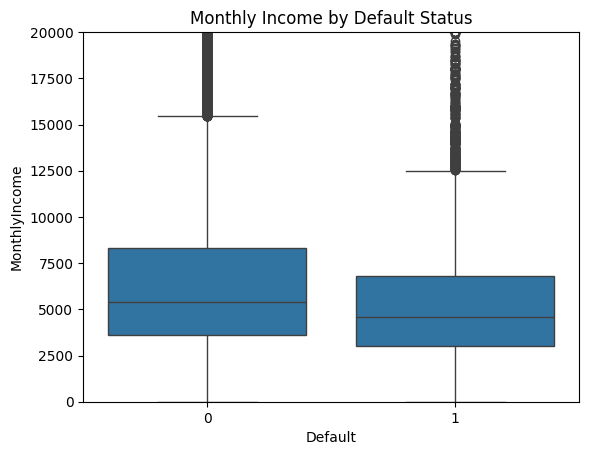

In [195]:
sns.boxplot(x='Default', y='MonthlyIncome', data=df)
plt.title("Monthly Income by Default Status")
plt.ylim(0, 20000)  # Limit to see better
plt.show()


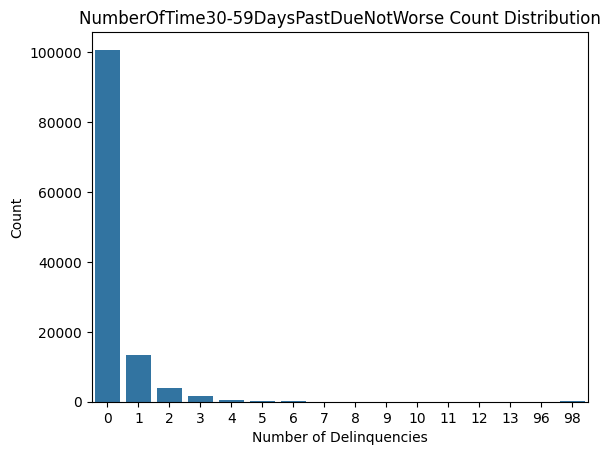

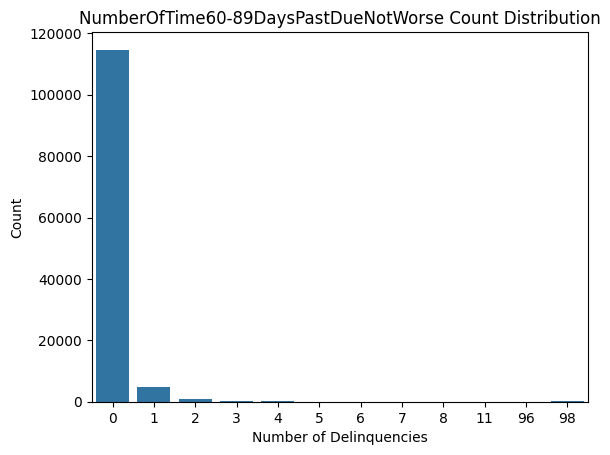

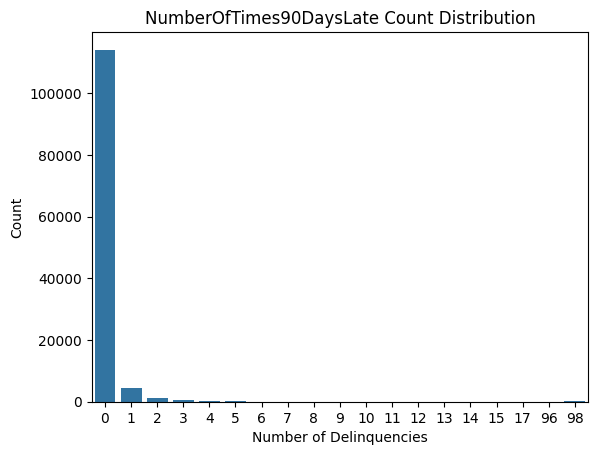

In [196]:
for feature in delinq_features:
    sns.countplot(x=df[feature])
    plt.title(f"{feature} Count Distribution")
    plt.xlabel("Number of Delinquencies")
    plt.ylabel("Count")
    plt.show()


In [197]:
for feature in delinq_features:
    print(df[feature].value_counts().sort_index())

NumberOfTime30-59DaysPastDueNotWorse
0     100785
1      13445
2       3907
3       1506
4        631
5        280
6        122
7         48
8         22
9         10
10         3
11         1
12         2
13         1
96         5
98       238
Name: count, dtype: int64
NumberOfTime60-89DaysPastDueNotWorse
0     114670
1       4786
2        906
3        265
4         84
5         27
6         16
7          6
8          2
11         1
96         5
98       238
Name: count, dtype: int64
NumberOfTimes90DaysLate
0     114149
1       4337
2       1239
3        549
4        244
5        103
6         61
7         29
8         16
9         14
10         8
11         3
12         2
13         4
14         2
15         2
17         1
96         5
98       238
Name: count, dtype: int64


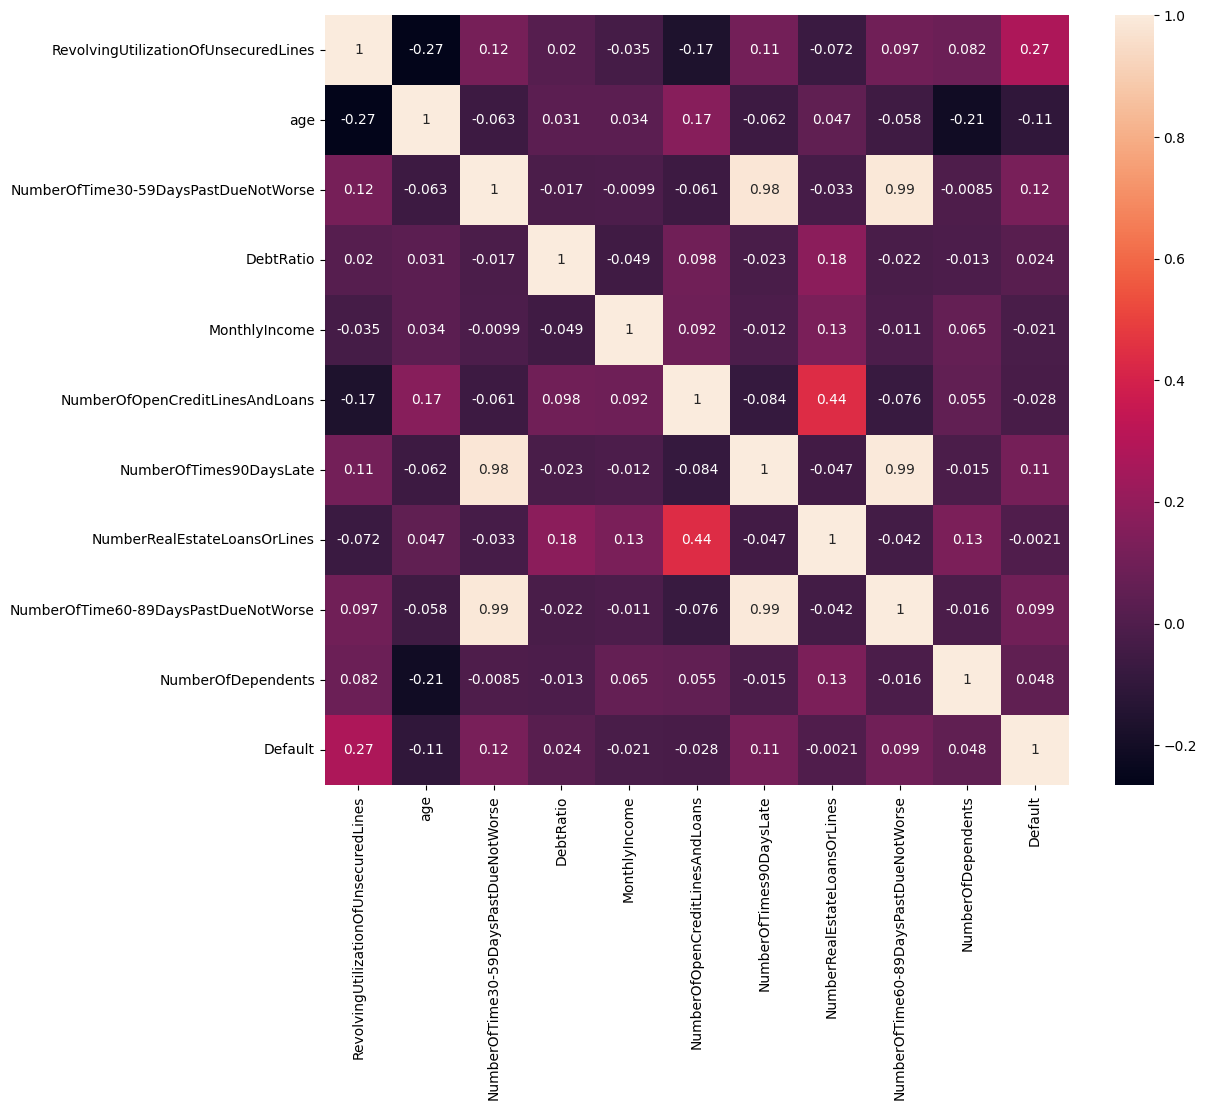

In [198]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),annot=True)
plt.show()


# ML-MODEL

In [199]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [200]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd
import numpy as np


In [201]:
# X = df.drop('Default', axis=1)

In [202]:
# y = df['Default']

In [203]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [204]:
# Features selected after EDA / collinearity cleanup
FEATURES = [
    'RevolvingUtilizationOfUnsecuredLines',
    'age',
    'DebtRatio',
    'MonthlyIncome',
    'NumberOfOpenCreditLinesAndLoans',
    'NumberRealEstateLoansOrLines',
    'NumberOfDependents',
    'NumberOfTime30-59DaysPastDueNotWorse'
]
TARGET = 'Default'


In [205]:
X = df[FEATURES]
y = df[TARGET]

In [206]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

In [207]:
# creating XGBoost pipeline

In [208]:
xgb_pipe = Pipeline([
    ('model', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])

param_grid_xgb = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5],
    'model__learning_rate': [0.01, 0.1]
}
xgb_cv = GridSearchCV(
    xgb_pipe,
    param_grid=param_grid_xgb,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1
)

In [209]:
# Fit
xgb_cv.fit(X_train, y_train)
best_xgb = xgb_cv.best_estimator_
print("Best XGB Parameters:", xgb_cv.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:39:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGB Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}


In [210]:
#creating LogReg pipeline

In [211]:
lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        penalty='l2',
        solver='lbfgs',
        max_iter=1000,
        random_state=42
    ))
])

param_grid_lr = {
    'model__C': [0.01, 0.1, 1, 10],
}
lr_cv = GridSearchCV(
    lr_pipe,
    param_grid=param_grid_lr,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1
)

In [212]:
# Fit
lr_cv.fit(X_train, y_train)
best_lr = lr_cv.best_estimator_
print("Best LR Parameters:", lr_cv.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best LR Parameters: {'model__C': 0.1}


In [213]:
def evaluate(model,X_t,y_t):
  y_pred=model.predict(X_t)
  y_prob=model.predict_proba(X_t)[:,1]
  print(classification_report(y_t,y_pred,digits=4))
  print("ROC AUC: ",roc_auc_score(y_t,y_prob).round(4))
  return y_prob

In [214]:
evaluate(best_xgb, X_test, y_test)

              precision    recall  f1-score   support

           0     0.9365    0.9939    0.9643     22520
           1     0.5446    0.0981    0.1662      1682

    accuracy                         0.9316     24202
   macro avg     0.7405    0.5460    0.5653     24202
weighted avg     0.9093    0.9316    0.9089     24202

ROC AUC:  0.8276


array([0.06367036, 0.02032471, 0.01180527, ..., 0.07649635, 0.01193553,
       0.07268227], dtype=float32)

In [215]:
evaluate(best_lr, X_test, y_test)

              precision    recall  f1-score   support

           0     0.9322    0.9968    0.9635     22520
           1     0.4132    0.0297    0.0555      1682

    accuracy                         0.9296     24202
   macro avg     0.6727    0.5133    0.5095     24202
weighted avg     0.8962    0.9296    0.9004     24202

ROC AUC:  0.7881


array([0.1017334 , 0.02735668, 0.01991081, ..., 0.1494269 , 0.02407049,
       0.14835399])

In [216]:
# model created and evaluated

In [217]:
import joblib

In [218]:
final_model = best_xgb

In [219]:
final_model_2 = best_lr

In [220]:
joblib.dump(final_model, "credit_risk_model.pkl")

['credit_risk_model.pkl']

In [221]:
joblib.dump(final_model_2, "credit_risk_model_2.pkl")

['credit_risk_model_2.pkl']

# **Model Explainability**

In [222]:
import shap

In [223]:
explainer=shap.Explainer(final_model.named_steps['model'],X_train)

In [224]:
shap_values=explainer(X_test)

100%|===================| 24174/24202 [01:03<00:00]       

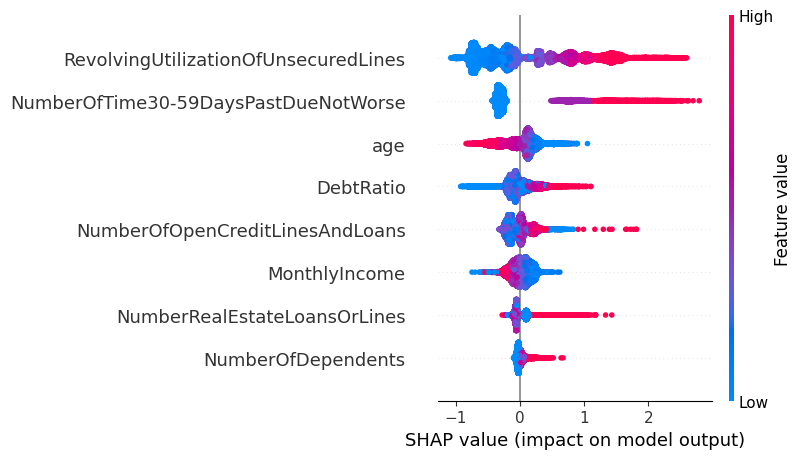

In [225]:
shap.summary_plot(shap_values,X_test)

# This gives Global feature importance and Helps compliance teams understand why a user was flagged as risky



In [226]:
explainer_2=shap.Explainer(final_model_2.named_steps['model'],X_train)

In [227]:
shap_values_2=explainer_2(X_test)

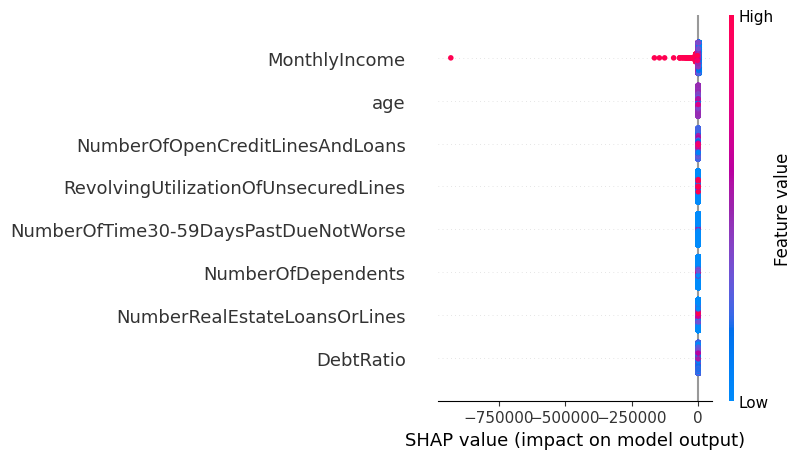

In [228]:
shap.summary_plot(shap_values_2,X_test)

#  To Save to SQLite

In [229]:
#Legacy System Integration

In [230]:
import sqlite3

In [231]:
conn = sqlite3.connect('credit_risk.db')

In [232]:
df.to_sql('applicants', conn, if_exists='replace', index=False)

121006

In [233]:
import pandas as pd

In [234]:
query = "SELECT * FROM applicants WHERE DebtRatio > 0.5 AND age < 25"

In [235]:
result_df = pd.read_sql(query, conn)

In [236]:
result_df.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Default
0,0.369472,21,0,7.000000,5400.0,1,0,0,0,0.0,0
1,0.000000,24,0,0.643118,820.0,4,0,0,0,0.0,0
2,1.000000,23,1,0.566038,900.0,4,0,0,0,0.0,0
3,1.000000,24,0,1.000000,5400.0,0,0,0,0,0.0,0
4,1.000000,24,0,0.679739,764.0,2,0,0,0,0.0,0


here we see  we have queried and gotten all the applicants where DebtRatio>0.5 and age <25 using SQL commands and access to a newly created database

In [237]:
# we can also use parmeterized queries

In [238]:
age_threshold=int(input())
debt_threshold=float(input())

25
0.5


In [239]:
query="SELECT * FROM applicants WHERE DebtRatio > ? AND age < ?"

In [240]:
result_df=pd.read_sql(query,conn,params=(debt_threshold,age_threshold))

In [241]:
result_df

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Default
0,0.369472,21,0,7.000000,5400.0,1,0,0,0,0.0,0
1,0.000000,24,0,0.643118,820.0,4,0,0,0,0.0,0
2,1.000000,23,1,0.566038,900.0,4,0,0,0,0.0,0
3,1.000000,24,0,1.000000,5400.0,0,0,0,0,0.0,0
4,1.000000,24,0,0.679739,764.0,2,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
194,0.055222,24,0,0.645554,820.0,5,0,0,0,0.0,0
195,1.000000,23,0,1.000000,5400.0,1,0,0,0,0.0,0
196,0.079920,23,0,2.000000,0.0,1,0,0,0,0.0,0
197,1.000000,23,0,2.000000,5400.0,0,0,0,0,0.0,0


In [242]:
query_2="SELECT * FROM applicants WHERE NumberOfTimes90DaysLate > 2;"

In [243]:
result_2_df = pd.read_sql(query_2, conn)

In [244]:
result_2_df

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Default
0,0.964673,40,3,0.382965,13700.0,9,3,1,1,2.0,1
1,1.000000,42,1,0.113422,6250.0,3,3,0,1,2.0,0
2,0.029643,50,0,0.399106,9400.0,15,3,4,0,0.0,0
3,0.339504,89,1,0.549380,2500.0,9,3,0,1,0.0,1
4,0.964561,35,4,0.305840,4400.0,10,3,0,2,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1276,1.000000,34,98,9.000000,5400.0,0,98,0,98,0.0,1
1277,1.744511,49,0,1.224310,2500.0,4,4,2,1,1.0,1
1278,1.000000,23,98,0.000000,5400.0,0,98,0,98,0.0,0
1279,0.820225,32,1,0.169961,4400.0,4,4,0,1,3.0,1


In [245]:
summary = df.groupby('Default')[['DebtRatio', 'MonthlyIncome']].mean()
summary.to_excel("credit_summary.xlsx")

In [250]:
summary

,DebtRatio,MonthlyIncome
Default,,
0,0.405155,6835.224522
1,0.467821,5678.287124


# THIS IS THE EXPLANATION SEGMENT:
What doe soutr default target segment implies:

0 → People who did NOT default within 2 years (Low Risk)

1 → People who DID default within 2 years (High Risk)

# RESULTS OF SUMMARY
## Monthly Income
Non-defaulters (0): ₹6,835

Defaulters (1): ₹5,678

Defaulters earn ₹1,157 less on average

## Debt Ratio
Non-defaulters (0): 0.405

Defaulters (1): 0.468

Defaulters show a higher debt-to-income ratio, meaning a greater share of their income is already committed to debt.


##Higher debt ratio + lower income = weaker financial health, which leads to:

##Struggles in paying off credit

##Higher chances of default

##This insight aligns with real-world lending risk assessment practices.





final summarization insight : Applicants who default tend to earn significantly less and have a higher portion of their income already tied up in debt obligations.
These two variables — MonthlyIncome and DebtRatio — are critical predictors and should be emphasized in credit risk modeling.

| Goal                    | Achieved Through                             |
| ----------------------- | -------------------------------------------- |
| Reduce loan defaults    | ML model flags risky applicants early        |
| Transparency & Trust    | SHAP explainability plots                    |
| Integrates with systems | SQL + Excel reports for legacy compatibility |
